## CECL Modeling Demo

### Business Problem

CECL (Current Expected Credit Loss) and IFRS 9 (International Financial Reporting Standard 9) are two accounting standards that deal with the measurement and reporting of credit losses for financial instruments. They were both introduced in response to the global financial crisis of 2007-2008 and are aimed at improving the accuracy and timeliness of credit loss recognition. CECL is specific to the United States and has a strong focus on lifetime expected credit losses, while IFRS 9 is an international standard with a more complex three-stage approach to credit loss measurement. Companies need to comply with the relevant standard based on their jurisdiction and reporting requirements.

CECL requires entities to estimate and recognize expected credit losses on financial assets over their entire contractual term, including potential future losses.The key principle of CECL is to recognize **credit losses based on the expected lifetime losses** rather than waiting for credit impairments to occur. It involves a **forward-looking** approach that considers various economic and credit factors to estimate future credit losses.

The CECL modeling requires a combination of historical data analysis, statistical modeling, economic forecasting, and scenario analysis. It is essential for financial institutions to have robust modeling frameworks and data governance processes in place to comply with CECL requirements and provide transparent and accurate information about credit risk and expected credit losses. Additionally, regulatory guidance and accounting standards may evolve, so staying up to date with industry best practices is crucial for effective CECL modeling.

### Project Tasks

In this project, I am planning to implement PD (Probability of Default), LGD (Loss Given Default), EAD (Exposure at Default) models, and calculate ECL (Expected Credit Loss). Here's a brief outline of the steps I want to follow for each of these tasks:

**1. PD (Probability of Default) Model**

- Data Preparation: Gather historical data on borrowers, including defaults and non-defaults.
- Segmentation: Group borrowers into homogenous segments based on shared characteristics.
- Model Selection: Choose an appropriate modeling technique (e.g., logistic regression, machine learning) for estimating PD.
- Parameter Estimation: Estimate model parameters using historical data.
- Validation: Validate the PD model to ensure its accuracy in predicting defaults.

**2. LGD (Loss Given Default) Model**

- Data Prepartion: Collect data on collateral values, recovery rates, and asset seniority.
- Model Selection: Choose a modeling approach (e.g., regression, DCF, machine learning) for LGD estimation.
- Parameter Estimation: Estimate LGD model parameters using historical data and factors influencing LGD.
- Validation: Validate the LGD model to assess its reliability in estimating loss in case of default.

**3. EAD (Exposure at Default) Model**

- Data Collection: Gather data on financial exposures, including credit limits, utilization rates, and contractual terms.
- Model Selection: Decide on a modeling method (e.g., static pool, maturity ladder, prepayment/utilization) for EAD estimation.
- Parameter Estimation: Estimate EAD model parameters based on historical data and borrower behavior.
- Stress Testing: Assess EAD sensitivity to adverse economic scenarios.

**4. ECL (Expected Credit Loss) Calculation:**

- Integration: Combine the PD, LGD, and EAD models to calculate ECL for each borrower or portfolio.
- Scenario Analysis: Consider different economic scenarios (baseline, adverse) for ECL estimation.
- Reporting: Document and report ECL results for risk management and regulatory compliance.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error

import datetime 

import warnings
warnings.filterwarnings("ignore")

### One year PD Modeling


- Default flag definition and data preparation
- Scorecard development
- GLM modeling


In [2]:
# Load oneyear_pd data
oneyear_pd = pd.read_csv("oneyear_pd.csv")

In [3]:
# Data validation
print(oneyear_pd.shape) # 25906 records
print(oneyear_pd.head())
print(oneyear_pd.info())
print(oneyear_pd.describe())

(25906, 44)
        id  vintage_year  monthly_installment  loan_balance  bureau_score  \
0  6670001          2005               746.70     131304.44         541.0   
1  9131199          2006               887.40     115486.51         441.0   
2  4963167          2004              1008.50     128381.73         282.0   
3  3918582          2005               458.23      35482.96         461.0   
4  5949777          2006               431.20      77086.31         466.0   

   num_bankrupt_iva  time_since_bankrupt  num_ccj  time_since_ccj  ccj_amount  \
0               0.0                  0.0      0.0             0.0         0.0   
1               0.0                  0.0      0.0             0.0         0.0   
2               0.0                  0.0      1.0            36.0       459.0   
3               0.0                  0.0      0.0             0.0         0.0   
4               0.0                  0.0      0.0             0.0         0.0   

   ...  months_since_2mia  avg_mia_6m 

In [4]:
# Check missing values
oneyear_pd.isnull().sum()

id                                   0
vintage_year                         0
monthly_installment                  0
loan_balance                         0
bureau_score                       433
num_bankrupt_iva                   433
time_since_bankrupt                433
num_ccj                            433
time_since_ccj                     433
ccj_amount                         433
num_bankrupt                       433
num_iva                            433
min_months_since_bankrupt          433
pl_flag                              0
region                               1
ltv                                  0
arrears_months                       0
origination_date                     0
maturity_date                        0
repayment_type                       0
arrears_status                       0
arrears_segment                      0
mob                                  0
remaining_mat                        0
loan_term                            0
live_status              

In [5]:
# Change dtype for 'origination_date'
import datetime 
oneyear_pd['origination_date'] = pd.to_datetime(oneyear_pd['origination_date'], format='%Y-%m-%d')

In [6]:
oneyear_pd.origination_date

0       2005-09-14
1       2006-01-20
2       2004-12-21
3       2005-06-21
4       2006-07-19
           ...    
25901   2004-08-31
25902   2005-04-29
25903   2007-03-07
25904   2006-01-13
25905   2006-07-25
Name: origination_date, Length: 25906, dtype: datetime64[ns]

In [7]:
oneyear_pd.columns

Index(['id', 'vintage_year', 'monthly_installment', 'loan_balance',
       'bureau_score', 'num_bankrupt_iva', 'time_since_bankrupt', 'num_ccj',
       'time_since_ccj', 'ccj_amount', 'num_bankrupt', 'num_iva',
       'min_months_since_bankrupt', 'pl_flag', 'region', 'ltv',
       'arrears_months', 'origination_date', 'maturity_date', 'repayment_type',
       'arrears_status', 'arrears_segment', 'mob', 'remaining_mat',
       'loan_term', 'live_status', 'repaid_status', 'month', 'arrears_event',
       'bankrupt_event', 'term_expiry_event', 'worst_arrears_status',
       'max_arrears_12m', 'recent_arrears_date', 'months_since_2mia',
       'avg_mia_6m', 'max_arrears_bal_6m', 'max_mia_6m', 'avg_bal_6m',
       'avg_bureau_score_6m', 'cc_util', 'annual_income', 'emp_length',
       'months_since_recent_cc_delinq'],
      dtype='object')

In [8]:
oneyear_pd.max_arrears_12m

0        0.000000
1        0.000000
2        2.188230
3        0.000000
4        0.000000
           ...   
25901    0.000000
25902    0.987898
25903    0.000000
25904    0.000000
25905    0.000000
Name: max_arrears_12m, Length: 25906, dtype: float64

In [9]:
oneyear_pd.max_arrears_12m = round(oneyear_pd.max_arrears_12m,4)

In [10]:
oneyear_pd.arrears_months

0        0.000000
1        0.000000
2        2.188230
3        0.000000
4        0.000000
           ...   
25901    0.000000
25902    0.987898
25903    0.000000
25904    0.000000
25905    0.000000
Name: arrears_months, Length: 25906, dtype: float64

In [11]:
oneyear_pd.arrears_months = round(oneyear_pd.arrears_months,4)
oneyear_pd.arrears_months

0        0.0000
1        0.0000
2        2.1882
3        0.0000
4        0.0000
          ...  
25901    0.0000
25902    0.9879
25903    0.0000
25904    0.0000
25905    0.0000
Name: arrears_months, Length: 25906, dtype: float64

In [12]:
# Default definition
# Define a function to calculate the 'default_flag' column
def calculate_default(row):
    if row['arrears_event'] == 1 or row['bankrupt_event'] == 1 or row['term_expiry_event'] == 1:
        return 1
    else:
        return 0

# Apply the function to create the 'default_event' column
oneyear_pd['default_flag'] = oneyear_pd.apply(calculate_default, axis=1)

In [13]:
oneyear_pd['default_flag'].mean() # 

0.05257469312128465

#### Univariate Analysis

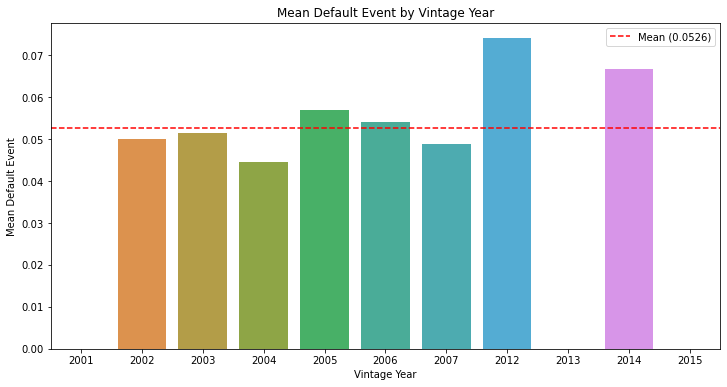

In [14]:
# Create a bar plot of the mean 'default_flag' by "vintage_year"
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(data=oneyear_pd, x='vintage_year', y='default_flag', ci=None) 

# Calculate the total mean of 'default_flag'
total_mean = oneyear_pd['default_flag'].mean()

# Add a horizontal line for the total mean
plt.axhline(total_mean, color='red', linestyle='--', label=f'Mean ({total_mean:.4f})')

# Set labels and title
plt.xlabel('Vintage Year')
plt.ylabel('Mean Default Event')
plt.title('Mean Default Event by Vintage Year')

# Show the plot
plt.legend()  # Show the legend with the total mean
plt.show()

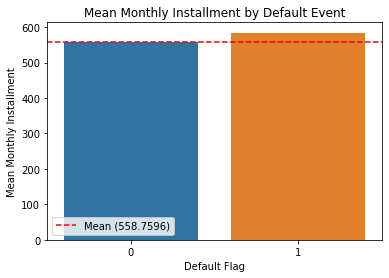

In [15]:
# Create a bar plot of the mean 'monthly_installment' by "default_flag"

sns.barplot(data=oneyear_pd, x='default_flag', y='monthly_installment', ci=None)

# Calculate the total mean of 'default_flag'
total_mean = oneyear_pd['monthly_installment'].mean()

# Add a horizontal line for the total mean
plt.axhline(total_mean, color='red', linestyle='--', label=f'Mean ({total_mean:.4f})')

# Set labels and title
plt.xlabel('Default Flag')
plt.ylabel('Mean Monthly Installment')
plt.title('Mean Monthly Installment by Default Event')

# Show the plot
plt.legend()  # Show the legend with the total mean
plt.show()

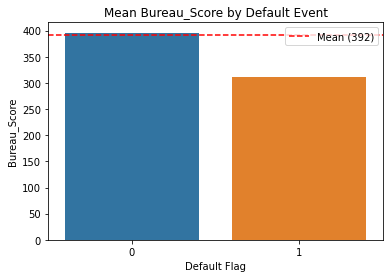

In [16]:
# Create a bar plot of the mean 'bureau_score' by "default_flag"

sns.barplot(data=oneyear_pd, x='default_flag', y='bureau_score', ci=None)

# Calculate the total mean of 'default_flag'
total_mean = oneyear_pd['bureau_score'].mean()

# Add a horizontal line for the total mean
plt.axhline(total_mean, color='red', linestyle='--', label=f'Mean ({total_mean:.0f})')

# Set labels and title
plt.xlabel('Default Flag')
plt.ylabel('Bureau_Score')
plt.title('Mean Bureau_Score by Default Event')

# Show the plot
plt.legend()  # Show the legend with the total mean
plt.show()

In [17]:
# Split the dataset into training and testing sets 70% vs 30%
train, test = train_test_split(oneyear_pd, test_size=0.3, random_state=42)

In [18]:
# WOE transform for bureau_score 
# There could be many different binning schemes, we could try it manually first to understand the processing
# Then we could use package such as scorecardpy/woe directly later)

# Assign WoE value -0.0910 to rows where 'bureau_score' is NaN
train.loc[train['bureau_score'].isna(), 'woe_bureau_score'] = -0.0910
# Assign WoE value -0.7994 to rows where 'bureau_score' is less than or equal to 308
train.loc[train['bureau_score'] <= 308, 'woe_bureau_score'] = -0.7994
# Assign WoE value -0.0545 to rows where 'bureau_score' is greater than 308 and less than or equal to 404
train.loc[(train['bureau_score'] > 308) & (train['bureau_score'] <= 404), 'woe_bureau_score'] = -0.0545
# Assign WoE value 0.7722 to rows where 'bureau_score' is greater than 404 and less than or equal to 483
train.loc[(train['bureau_score'] > 404) & (train['bureau_score'] <= 483), 'woe_bureau_score'] = 0.7722
# Assign WoE value 1.0375 to rows where 'bureau_score' is greater than 483
train.loc[train['bureau_score'] > 483, 'woe_bureau_score'] = 1.0375

In [19]:
# Assign WoE value -0.0910 to rows where 'bureau_score' is NaN
test.loc[test['bureau_score'].isna(), 'woe_bureau_score'] = -0.0910
# Assign WoE value -0.7994 to rows where 'bureau_score' is less than or equal to 308
test.loc[test['bureau_score'] <= 308, 'woe_bureau_score'] = -0.7994
# Assign WoE value -0.0545 to rows where 'bureau_score' is greater than 308 and less than or equal to 404
test.loc[(test['bureau_score'] > 308) & (test['bureau_score'] <= 404), 'woe_bureau_score'] = -0.0545
# Assign WoE value 0.7722 to rows where 'bureau_score' is greater than 404 and less than or equal to 483
test.loc[(test['bureau_score'] > 404) & (test['bureau_score'] <= 483), 'woe_bureau_score'] = 0.7722
# Assign WoE value 1.0375 to rows where 'bureau_score' is greater than 483
test.loc[test['bureau_score'] > 483, 'woe_bureau_score'] = 1.0375

In [20]:
# WoE transform for cc_util

#train dataframe

# Assign WoE value 0 to rows where 'cc_util' is NaN
train.loc[train['cc_util'].isna(), 'woe_cc_util'] = 0
# Assign WoE value 1.8323 to rows where 'cc_util' is less than or equal to 0.55
train.loc[train['cc_util'] <= 0.55, 'woe_cc_util'] = 1.8323
# Assign WoE value -0.4867 to rows where 'cc_util' is greater than 0.55 and less than or equal to 0.70
train.loc[(train['cc_util'] > 0.55) & (train['cc_util'] <= 0.70), 'woe_cc_util'] = -0.4867
# Assign WoE value -1.1623 to rows where 'cc_util' is greater than 0.70 and less than or equal to 0.85
train.loc[(train['cc_util'] > 0.70) & (train['cc_util'] <= 0.85), 'woe_cc_util'] = -1.1623
# Assign WoE value -2.3562 to rows where 'cc_util' is greater than 0.85
train.loc[train['cc_util'] > 0.85, 'woe_cc_util'] = -2.3562

# test dataframe

# Assign WoE value 0 to rows where 'cc_util' is NaN
test.loc[test['cc_util'].isna(), 'woe_cc_util'] = 0
# Assign WoE value 1.8323 to rows where 'cc_util' is less than or equal to 0.55
test.loc[test['cc_util'] <= 0.55, 'woe_cc_util'] = 1.8323
# Assign WoE value -0.4867 to rows where 'cc_util' is greater than 0.55 and less than or equal to 0.70
test.loc[(test['cc_util'] > 0.55) & (test['cc_util'] <= 0.70), 'woe_cc_util'] = -0.4867
# Assign WoE value -1.1623 to rows where 'cc_util' is greater than 0.70 and less than or equal to 0.85
test.loc[(test['cc_util'] > 0.70) & (test['cc_util'] <= 0.85), 'woe_cc_util'] = -1.1623
# Assign WoE value -2.3562 to rows where 'cc_util' is greater than 0.85
test.loc[test['cc_util'] > 0.85, 'woe_cc_util'] = -2.3562


In [21]:
# num_ccj
train.loc[train['num_ccj'].isna(), 'woe_num_ccj'] = -0.0910
train.loc[train['num_ccj'] <= 0, 'woe_num_ccj'] = 0.1877
train.loc[(train['num_ccj'] > 0) & (train['num_ccj'] <= 1), 'woe_num_ccj'] = -0.9166
train.loc[train['num_ccj'] > 1, 'woe_num_ccj'] = -1.1322

test.loc[test['num_ccj'].isna(), 'woe_num_ccj'] = -0.0910
test.loc[test['num_ccj'] <= 0, 'woe_num_ccj'] = 0.1877
test.loc[(test['num_ccj'] > 0) & (test['num_ccj'] <= 1), 'woe_num_ccj'] = -0.9166
test.loc[test['num_ccj'] > 1, 'woe_num_ccj'] = -1.1322

In [22]:
# max_arrears_12m'
train.loc[train['max_arrears_12m'].isna(), 'woe_max_arrears_12m'] = 0
train.loc[train['max_arrears_12m'] <= 0, 'woe_max_arrears_12m'] = 0.7027
train.loc[(train['max_arrears_12m'] > 0) & (train['max_arrears_12m'] <= 1), 'woe_max_arrears_12m'] = -0.8291
train.loc[(train['max_arrears_12m'] > 1) & (train['max_arrears_12m'] <= 1.4), 'woe_max_arrears_12m'] = -1.1908
train.loc[train['max_arrears_12m'] > 1.4, 'woe_max_arrears_12m'] = -2.2223

test.loc[test['max_arrears_12m'].isna(), 'woe_max_arrears_12m'] = 0
test.loc[test['max_arrears_12m'] <= 0, 'woe_max_arrears_12m'] = 0.7027
test.loc[(test['max_arrears_12m'] > 0) & (test['max_arrears_12m'] <= 1), 'woe_max_arrears_12m'] = -0.8291
test.loc[(test['max_arrears_12m'] > 1) & (test['max_arrears_12m'] <= 1.4), 'woe_max_arrears_12m'] = -1.1908
test.loc[test['max_arrears_12m'] > 1.4, 'woe_max_arrears_12m'] = -2.2223


In [23]:
# max_arrears_bal_6m
train.loc[train['max_arrears_bal_6m'].isna(), 'woe_max_arrears_bal_6m'] = 0
train.loc[train['max_arrears_bal_6m'] <= 0, 'woe_max_arrears_bal_6m'] = 0.5771
train.loc[(train['max_arrears_bal_6m'] > 0) & (train['max_arrears_bal_6m'] <= 300), 'woe_max_arrears_bal_6m'] = -0.7818
train.loc[(train['max_arrears_bal_6m'] > 300) & (train['max_arrears_bal_6m'] <= 600), 'woe_max_arrears_bal_6m'] = -1.2958
train.loc[(train['max_arrears_bal_6m'] > 600) & (train['max_arrears_bal_6m'] <= 900), 'woe_max_arrears_bal_6m'] = -1.5753
train.loc[train['max_arrears_bal_6m'] > 900, 'woe_max_arrears_bal_6m'] = -2.2110

test.loc[test['max_arrears_bal_6m'].isna(), 'woe_max_arrears_bal_6m'] = 0
test.loc[test['max_arrears_bal_6m'] <= 0, 'woe_max_arrears_bal_6m'] = 0.5771
test.loc[(test['max_arrears_bal_6m'] > 0) & (test['max_arrears_bal_6m'] <= 300), 'woe_max_arrears_bal_6m'] = -0.7818
test.loc[(test['max_arrears_bal_6m'] > 300) & (test['max_arrears_bal_6m'] <= 600), 'woe_max_arrears_bal_6m'] = -1.2958
test.loc[(test['max_arrears_bal_6m'] > 600) & (test['max_arrears_bal_6m'] <= 900), 'woe_max_arrears_bal_6m'] = -1.5753
test.loc[test['max_arrears_bal_6m'] > 900, 'woe_max_arrears_bal_6m'] = -2.2110


In [24]:
# Employment length (years)
train.loc[train['emp_length'].isna(), 'woe_emp_length'] = 0
train.loc[train['emp_length'] <= 2, 'woe_emp_length'] = -0.7514
train.loc[(train['emp_length'] > 2) & (train['emp_length'] <= 4), 'woe_emp_length'] = -0.3695
train.loc[(train['emp_length'] > 4) & (train['emp_length'] <= 7), 'woe_emp_length'] = 0.1783
train.loc[train['emp_length'] > 7, 'woe_emp_length'] = 0.5827

test.loc[test['emp_length'].isna(), 'woe_emp_length'] = 0
test.loc[test['emp_length'] <= 2, 'woe_emp_length'] = -0.7514
test.loc[(test['emp_length'] > 2) & (test['emp_length'] <= 4), 'woe_emp_length'] = -0.3695
test.loc[(test['emp_length'] > 4) & (test['emp_length'] <= 7), 'woe_emp_length'] = 0.1783
test.loc[test['emp_length'] > 7, 'woe_emp_length'] = 0.5827


In [25]:
# months_since_recent_cc_delinq
train.loc[train['months_since_recent_cc_delinq'].isna(), 'woe_months_since_recent_cc_delinq'] = 0
train.loc[train['months_since_recent_cc_delinq'] <= 6, 'woe_months_since_recent_cc_delinq'] = -0.4176
train.loc[(train['months_since_recent_cc_delinq'] > 6) & (train['months_since_recent_cc_delinq'] <= 11), 'woe_months_since_recent_cc_delinq'] = -0.1942
train.loc[train['months_since_recent_cc_delinq'] > 11, 'woe_months_since_recent_cc_delinq'] = 1.3166

test['woe_months_since_recent_cc_delinq'] = np.nan
test.loc[test['months_since_recent_cc_delinq'].isna(), 'woe_months_since_recent_cc_delinq'] = 0
test.loc[test['months_since_recent_cc_delinq'] <= 6, 'woe_months_since_recent_cc_delinq'] = -0.4176
test.loc[(test['months_since_recent_cc_delinq'] > 6) & (test['months_since_recent_cc_delinq'] <= 11), 'woe_months_since_recent_cc_delinq'] = -0.1942
test.loc[test['months_since_recent_cc_delinq'] > 11, 'woe_months_since_recent_cc_delinq'] = 1.3166

In [26]:
# annual_income
train.loc[train['annual_income'].isna(), 'woe_annual_income'] = 0
train.loc[train['annual_income'] <= 35064, 'woe_annual_income'] = -1.8243
train.loc[(train['annual_income'] > 35064) & (train['annual_income'] <= 41999), 'woe_annual_income'] = -0.8272
train.loc[(train['annual_income'] > 41999) & (train['annual_income'] <= 50111), 'woe_annual_income'] = -0.3294
train.loc[(train['annual_income'] > 50111) & (train['annual_income'] <= 65050), 'woe_annual_income'] = 0.2379
train.loc[train['annual_income'] > 65050, 'woe_annual_income'] = 0.6234

test.loc[test['annual_income'].isna(), 'woe_annual_income'] = 0
test.loc[test['annual_income'] <= 35064, 'woe_annual_income'] = -1.8243
test.loc[(test['annual_income'] > 35064) & (test['annual_income'] <= 41999), 'woe_annual_income'] = -0.8272
test.loc[(test['annual_income'] > 41999) & (test['annual_income'] <= 50111), 'woe_annual_income'] = -0.3294
test.loc[(test['annual_income'] > 50111) & (test['annual_income'] <= 65050), 'woe_annual_income'] = 0.2379
test.loc[test['annual_income'] > 65050, 'woe_annual_income'] = 0.6234

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18134 entries, 21739 to 23654
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 18134 non-null  int64         
 1   vintage_year                       18134 non-null  int64         
 2   monthly_installment                18134 non-null  float64       
 3   loan_balance                       18134 non-null  float64       
 4   bureau_score                       17846 non-null  float64       
 5   num_bankrupt_iva                   17846 non-null  float64       
 6   time_since_bankrupt                17846 non-null  float64       
 7   num_ccj                            17846 non-null  float64       
 8   time_since_ccj                     17846 non-null  float64       
 9   ccj_amount                         17846 non-null  float64       
 10  num_bankrupt                  

In [28]:
pip install scorecardpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install woe

Note: you may need to restart the kernel to use updated packages.


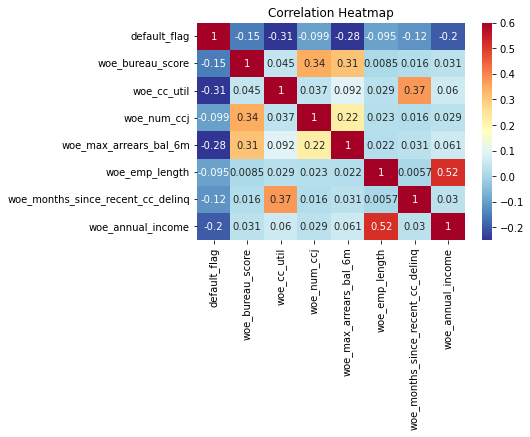

In [30]:
#Plotting the heat map to find the correlation between the columns
# Extract the some variables and show correlations
ext_cols = ['default_flag','woe_bureau_score', 'woe_cc_util', 'woe_num_ccj',
       'woe_max_arrears_bal_6m', 'woe_emp_length',
       'woe_months_since_recent_cc_delinq', 'woe_annual_income']
ext_data = train[ext_cols]
ext_data_corrs = ext_data.corr()

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');


In [31]:
import scorecardpy as sc

# Perform IV analysis
features_to_analyze = ['woe_bureau_score', 'woe_cc_util', 'woe_num_ccj',
       'woe_max_arrears_bal_6m', 'woe_emp_length',
       'woe_months_since_recent_cc_delinq', 'woe_annual_income']
iv_df = sc.iv(train, y='default_flag', x=features_to_analyze)

# Print IV values
print(iv_df)

                            variable  info_value
1                        woe_cc_util    1.890697
3             woe_max_arrears_bal_6m    0.889556
6                  woe_annual_income    0.519880
0                   woe_bureau_score    0.498704
5  woe_months_since_recent_cc_delinq    0.416614
4                     woe_emp_length    0.178858
2                        woe_num_ccj    0.143283


In [32]:
# Try logistic model with WoE 
logistic_model = LogisticRegression(random_state=42)
X_train = train[['woe_bureau_score', 'woe_cc_util', 'woe_num_ccj',
       'woe_max_arrears_bal_6m', 'woe_emp_length',
       'woe_months_since_recent_cc_delinq', 'woe_annual_income']]
y_train = train['default_flag']
X_test =  test[['woe_bureau_score', 'woe_cc_util', 'woe_num_ccj',
       'woe_max_arrears_bal_6m', 'woe_emp_length',
       'woe_months_since_recent_cc_delinq', 'woe_annual_income']]
y_test = test['default_flag']
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [33]:
logistic_model.intercept_

array([-2.93168796])

In [34]:
logistic_model.coef_

array([[-0.60343978, -0.96061713, -0.06693415, -0.79050608, -0.14371121,
        -0.33044836, -0.91447147]])

In [35]:
y_pred = logistic_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9557385486361297
Confusion Matrix:
[[7277   51]
 [ 293  151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7328
           1       0.75      0.34      0.47       444

    accuracy                           0.96      7772
   macro avg       0.85      0.67      0.72      7772
weighted avg       0.95      0.96      0.95      7772



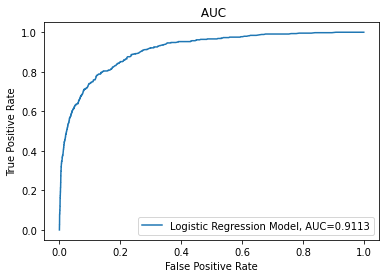

In [37]:
#set up plotting area
plt.figure(0).clf()
#fit logistic regression model and plot ROC curve
y_pred = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression Model, AUC="+str(auc))

plt.title(" AUC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#add legend
plt.legend()

### Lifetime PD
Lifttime PD GLM Framework: 
- One-year PIT PDs
- Link function: portfolio-level GLM analysis, account-level GLM analysis
- PD shift
- Lifetime PDs: forward-looking PDs


- Data Preparation
- GLM Modeling
- Survival Modeling
- Transition Matrix Modeling

#### Data Preparation: 
Account-level information based on the same account is collected through time to bulid a panel structure. When data are not granular enough to allow for a panel investigation, portfolio-level modeling is regarded as one of the alternatives.

There are 42442 records with 34 columns in the dataset. (BVs, MVs)
- id: 
- report_date
- year
- quarter
- month
- balance
- origination_date
- maturity_date
- repayment_type
- loan_term
- vintage_year
- mob:
- remaining_term: time to maturity
- bureau_score_orig
- default_flag
- loan status
- default_ind
- tob: time on book
- first_time
- last_time
- num_periods
- start_time
- end_time
- income
- gdp: gross domestic product
- uer: unemploymen rate
- cpi: consumer price index
- hpi: housing price index
- ir: short term interest rate
- gdp_lag: 
- uer_lag
- cpi_lag
- hpi_lag
- ltv_utd: loan-to-value updated

In [38]:
lifetime_pd = pd.read_csv("lifetime_pd.csv")
print(lifetime_pd.shape) # 42442 records
print(lifetime_pd.head())
print(lifetime_pd.columns)

(42442, 34)
        id report_date  year  quarter  month    balance origination_date  \
0  1002023  2003-03-31  2003        1      3   41304.36       2001-07-26   
1  1002023  2003-06-30  2003        2      6   40287.72       2001-07-26   
2  1002023  2003-09-30  2003        3      9   39252.42       2001-07-26   
3  1002023  2003-12-31  2003        4     12   38214.28       2001-07-26   
4  1002920  2008-06-30  2008        2      6  108395.53       2008-04-29   

  maturity_date repayment_type  loan_term  ...    gdp  uer  cpi     hpi    ir  \
0    2011-07-26      Repayment        120  ...  3.221  5.2  1.5  25.108  4.32   
1    2011-07-26      Repayment        120  ...  3.397  4.9  1.3  22.336  4.28   
2    2011-07-26      Repayment        120  ...  3.644  5.0  1.4  18.882  4.57   
3    2011-07-26      Repayment        120  ...  3.597  4.9  1.3  16.817  4.92   
4    2033-04-29  Interest Only        300  ...  1.005  5.3  3.4  -5.192  4.87   

    gdp_lag  uer_lag  cpi_lag    hpi_lag  lt

In [39]:
# Check missing value:

lifetime_pd.isnull().sum()

# There is no missing value in the dataset

id                   0
report_date          0
year                 0
quarter              0
month                0
balance              0
origination_date     0
maturity_date        0
repayment_type       0
loan_term            0
vintage_year         0
mob                  0
remaining_term       0
bureau_score_orig    0
default_flag         0
loan_status          0
default_ind          0
tob                  0
first_time           0
last_time            0
num_periods          0
start_time           0
end_time             0
income               0
gdp                  0
uer                  0
cpi                  0
hpi                  0
ir                   0
gdp_lag              0
uer_lag              0
cpi_lag              0
hpi_lag              0
ltv_utd              0
dtype: int64

In [40]:
# Compute default rate (year of report_date)
# Change dtype for 'report_date'
import datetime 
lifetime_pd['report_date'] = pd.to_datetime(lifetime_pd['report_date'], format='%Y-%m-%d')

In [41]:
lifetime_pd.year

0        2003
1        2003
2        2003
3        2003
4        2008
         ... 
42437    2006
42438    2007
42439    2007
42440    2007
42441    2007
Name: year, Length: 42442, dtype: int64

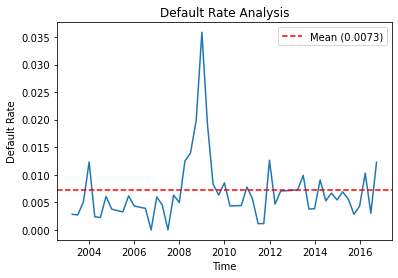

In [42]:
# Create a bar plot of the mean 'default_event' by year
sns.lineplot(data=lifetime_pd, x='report_date', y='default_flag', ci=None)  # ci=None to remove confidence intervals

# Calculate the total mean of 'default_event'
total_mean =lifetime_pd['default_flag'].mean()

# Add a horizontal line for the total mean
plt.axhline(total_mean, color='red', linestyle='--', label=f'Mean ({total_mean:.4f})')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Default Rate')
plt.title('Default Rate Analysis')

# Show the plot
plt.legend()  # Show the legend with the total mean
plt.show()

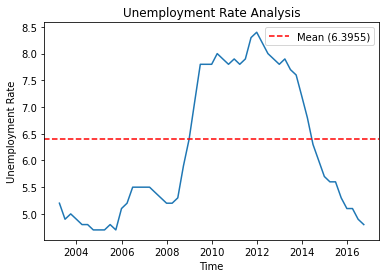

In [43]:
# Create a bar plot of the mean 'default_event' by year
sns.lineplot(data=lifetime_pd, x='report_date', y='uer', ci=None)  # ci=None to remove confidence intervals

# Calculate the total mean of 'default_event'
total_mean =lifetime_pd['uer'].mean()

# Add a horizontal line for the total mean
plt.axhline(total_mean, color='red', linestyle='--', label=f'Mean ({total_mean:.4f})')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Analysis')

# Show the plot
plt.legend()  # Show the legend with the total mean
plt.show()


In [44]:
# Split the dataset into training and testing sets at 2013
train_ltpd = lifetime_pd[lifetime_pd.report_date <= "2013-12-31" ]
test_ltpd = lifetime_pd[lifetime_pd.report_date > "2013-12-31" ]

In [45]:
print(train_ltpd.shape)
print(test_ltpd.shape)

(34598, 34)
(7844, 34)


In [46]:
portfolio = pd.read_csv("portfolio_dr.csv")
portfolio.head()

,date,dr,gdp,uer,cpi,hpi,ir
0,2003-03-31,1.08,3.221,5.2,1.5,25.108,4.32
1,2003-06-30,0.93,3.397,4.9,1.3,22.336,4.28
2,2003-09-30,0.79,3.644,5.0,1.4,18.882,4.57
3,2003-12-31,0.64,3.597,4.9,1.3,16.817,4.92
4,2004-03-30,0.59,3.332,4.8,1.3,17.301,4.73


In [47]:
portfolio.info()
# date is object > datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    41 non-null     object 
 1   dr      41 non-null     float64
 2   gdp     41 non-null     float64
 3   uer     41 non-null     float64
 4   cpi     41 non-null     float64
 5   hpi     41 non-null     float64
 6   ir      41 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.4+ KB


In [48]:
portfolio['date'] = pd.to_datetime(portfolio['date'], format='%Y-%m-%d')

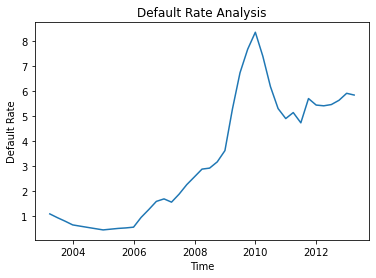

In [49]:
# Create a bar plot of the mean 'default_event' by year
sns.lineplot(data=portfolio, x='date', y='dr', ci=None)  # ci=None to remove confidence intervals

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Default Rate')
plt.title('Default Rate Analysis')

# Show the plot
plt.show()

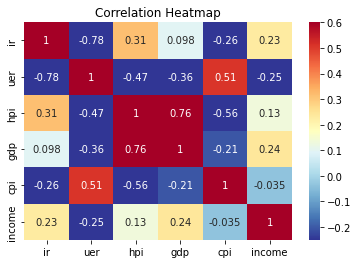

In [50]:
# Account_level:
cols = ['ir','uer','hpi','gdp','cpi','income']

# Heatmap of correlations
sns.heatmap(train_ltpd[cols].corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');


In [51]:
train_ltpd.columns

Index(['id', 'report_date', 'year', 'quarter', 'month', 'balance',
       'origination_date', 'maturity_date', 'repayment_type', 'loan_term',
       'vintage_year', 'mob', 'remaining_term', 'bureau_score_orig',
       'default_flag', 'loan_status', 'default_ind', 'tob', 'first_time',
       'last_time', 'num_periods', 'start_time', 'end_time', 'income', 'gdp',
       'uer', 'cpi', 'hpi', 'ir', 'gdp_lag', 'uer_lag', 'cpi_lag', 'hpi_lag',
       'ltv_utd'],
      dtype='object')

In [52]:
def remain(row):
    if row['remaining_term'] >36:
        return 1
    else:
        return 0

# Apply the function to create the 'default_event' column
train_ltpd["seasoning"]= train_ltpd.apply(remain, axis=1)
test_ltpd["seasoning"]= test_ltpd.apply(remain, axis=1)

In [53]:
# fit model:
logistic_model_lt = LogisticRegression(random_state=42)
feature_cols = ["seasoning","hpi"]
X_train = train_ltpd[feature_cols]
y_train = train_ltpd["default_flag"]
X_test = test_ltpd[feature_cols]
y_test = test_ltpd["default_flag"]
logistic_model_lt.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [54]:
logistic_model_lt.intercept_

array([-3.46325206])

In [55]:
logistic_model_lt.coef_

array([[-1.48764025, -0.06484261]])

In [56]:
y_pred = logistic_model_lt.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9934982151963284
Confusion Matrix:
[[7793    0]
 [  51    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7793
           1       0.00      0.00      0.00        51

    accuracy                           0.99      7844
   macro avg       0.50      0.50      0.50      7844
weighted avg       0.99      0.99      0.99      7844



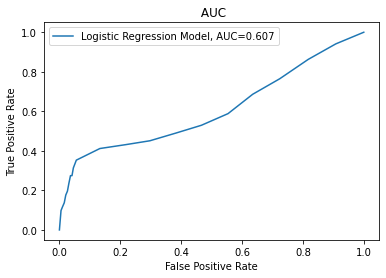

In [58]:
#set up plotting area
plt.figure(0).clf()
#fit logistic regression model and plot ROC curve
y_pred = logistic_model_lt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression Model, AUC="+str(auc))

plt.title(" AUC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#add legend

plt.legend()

#### Survival Modeling

#### Transition Matrix Modeling
- Naive Markov Chain Modeling
- Merton_like Transition Modeling
- Multi State Modeling


### LGD Modeling
- LGD data preparation
- LGD micro-structure approach
- LGD Regression methods


#### LGD Data Preparation

 There are 430 records with 14 columns. LGD analysis is conducted on defaulted accounts only.
- new_loan_id:
- balance_at_default
- shortfall
- flag_sold: non-cured account
- net_sale_proceeds
- balance_at_wo
- ltv_utd: loan to value updated
- index_value_new
- time since default
- repayment_type segment
- tob: time on book
- months_to_maturity
- region
- shortfall_balance_wo


#### LGD Micro-Structure Approach
- Probability of Cure
- Severity
- Discount Rate

In [59]:
lgd = pd.read_csv("lgd.csv")
print(lgd.shape)
print(lgd.head())
print(lgd.columns)

(430, 14)
  new_loan_id  balance_at_default  shortfall  flag_sold  net_sale_proceeds  \
0      N11901           170203.44   24385.20          1          152990.38   
1      N11902            60368.09   40210.91          1           29237.60   
2      N11903           207838.69   56582.39          1          156550.00   
3      N11904            73736.79   62337.83          1           17373.07   
4      N11905           132064.54     526.52          1          127810.00   

   balance_at_wo   ltv_utd  index_value_new  time_since_default  \
0      177375.58  0.448436        271673.43                  72   
1       69448.51  0.838799         64880.89                  72   
2      213132.39  0.522509        233595.34                  72   
3       79710.90  1.231607         60396.20                  72   
4      128336.52  0.400000        126315.47                  72   

  repayment_type_segment  tob  months_to_maturity region  shortfall_balance_wo  
0                     IO  164        

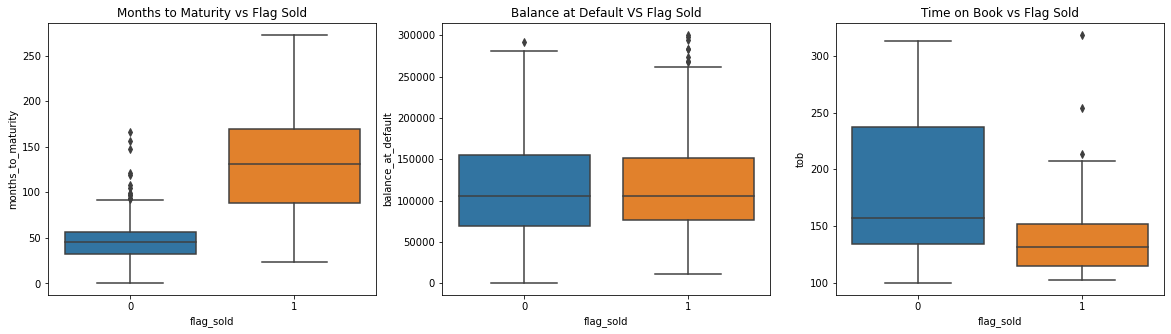

In [60]:
# Explorative analysis
# Box-plot
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(x ='flag_sold',y= "months_to_maturity",data = lgd, ax=axes[0]).set(title='Months to Maturity vs Flag Sold')
sns.boxplot(x ='flag_sold',y='balance_at_default', data = lgd,ax=axes[1]).set(title='Balance at Default VS Flag Sold')
sns.boxplot(x ='flag_sold',y='tob',data = lgd, ax=axes[2]).set(title='Time on Book vs Flag Sold')
plt.show()

# months to maturity could be a good predictor

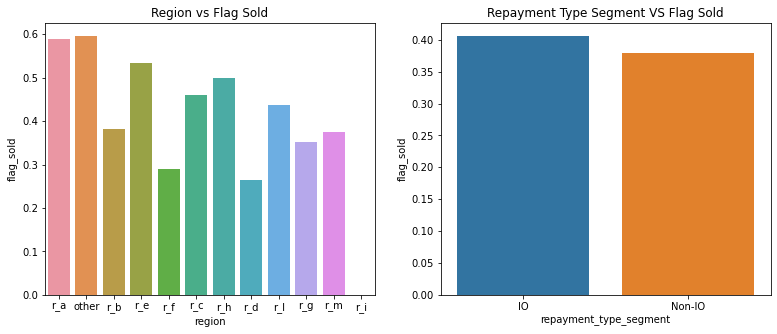

In [61]:
# Bar-plot
fig, axes = plt.subplots(1,2,figsize=(13,5))
sns.barplot(x = "region",y ='flag_sold',data = lgd, ci= None, ax=axes[0]).set(title='Region vs Flag Sold')
sns.barplot(x= 'repayment_type_segment', y ='flag_sold', data = lgd, ci= None, ax=axes[1]).set(title='Repayment Type Segment VS Flag Sold')
plt.show()

In [62]:
# Split the dataset into training and testing sets 70% vs 30%
train, test = train_test_split(lgd, test_size=0.3, random_state=42)

In [63]:
# Perform IV analysis
features_to_analyze = ['balance_at_default', 'shortfall', 'ltv_utd', 'index_value_new','time_since_default', 
                       'repayment_type_segment', 'tob','months_to_maturity', 'region', 'shortfall_balance_wo']
iv_df = sc.iv(train,x=features_to_analyze, y='flag_sold', )

# Print IV values
print(iv_df)

# Strong: 'months_to_maturity', 'balance_at_default', 'shortfall','shortfall_balance_wo','tob', 'ltv_utd'

                 variable  info_value
7      months_to_maturity    1.066796
1               shortfall    0.702386
9    shortfall_balance_wo    0.702386
6                     tob    0.559308
4      time_since_default    0.300551
8                  region    0.168292
2                 ltv_utd    0.105087
0      balance_at_default    0.010404
3         index_value_new    0.010404
5  repayment_type_segment    0.000434


In [64]:
# Binning Analysis:
# woe_months_to_mnaturity:
train.loc[train['months_to_maturity'].isna(), 'woe_months_to_maturity'] = -0.6796
train.loc[train['months_to_maturity'] <= 48, 'woe_months_to_maturity'] = 1.0169
train.loc[(train['months_to_maturity'] > 48) & (train['months_to_maturity'] <= 132), 'woe_months_to_maturity'] = -0.2135
train.loc[train['months_to_maturity'] > 132, 'woe_months_to_maturity'] = -0.6796

test.loc[test['months_to_maturity'].isna(), 'woe_months_to_maturity'] = -0.6796
test.loc[test['months_to_maturity'] <= 48, 'woe_months_to_maturity'] = 1.0169
test.loc[(test['months_to_maturity'] > 48) & (test['months_to_maturity'] <= 132), 'woe_months_to_maturity'] = -0.2135
test.loc[test['months_to_maturity'] > 132, 'woe_months_to_maturity'] = -0.6796


In [65]:
# ltv_utd
train.loc[train['ltv_utd'].isna(), 'woe_ltv_utd'] = -0.6243
train.loc[train['ltv_utd'] <= 0.6078, 'woe_ltv_utd'] = 1.3041
train.loc[(train['ltv_utd'] > 0.6078) & (train['ltv_utd'] <= 0.7617), 'woe_ltv_utd'] = 0.1313
train.loc[(train['ltv_utd'] > 0.7617) & (train['ltv_utd'] <= 0.9196), 'woe_ltv_utd'] = -0.5696
train.loc[train['ltv_utd'] > 0.9196, 'woe_ltv_utd'] = -0.6243

test.loc[test['ltv_utd'].isna(), 'woe_ltv_utd'] = -0.6243
test.loc[test['ltv_utd'] <= 0.6078, 'woe_ltv_utd'] = 1.3041
test.loc[(test['ltv_utd'] > 0.6078) & (test['ltv_utd'] <= 0.7617), 'woe_ltv_utd'] = 0.1313
test.loc[(test['ltv_utd'] > 0.7617) & (test['ltv_utd'] <= 0.9196), 'woe_ltv_utd'] = -0.5696
test.loc[test['ltv_utd'] > 0.9196, 'woe_ltv_utd'] = -0.6243


In [66]:
# tob
train.loc[train['tob'].isna(), 'woe_tob'] = 0.7888
train.loc[train['tob'] <= 117, 'woe_tob'] = -0.6278
train.loc[(train['tob'] > 117) & (train['tob'] <= 137), 'woe_tob'] = -0.2228
train.loc[(train['tob'] > 137) & (train['tob'] <= 153), 'woe_tob'] = -0.2290
train.loc[train['tob'] > 153, 'woe_tob'] = 0.7888

test.loc[test['tob'].isna(), 'woe_tob'] = 0.7888
test.loc[test['tob'] <= 117, 'woe_tob'] = -0.6278
test.loc[(test['tob'] > 117) & (test['tob'] <= 137), 'woe_tob'] = -0.2228
test.loc[(test['tob'] > 137) & (test['tob'] <= 153), 'woe_tob'] = -0.2290
test.loc[test['tob'] > 153, 'woe_tob'] = 0.7888

In [67]:
# Perform IV analysis
features_to_analyze = ['woe_months_to_maturity', 'woe_ltv_utd', 'woe_tob']

iv_df = sc.iv(train,x=features_to_analyze, y='flag_sold', )

# Print IV values
print(iv_df)

                 variable  info_value
0  woe_months_to_maturity    4.406169
2                 woe_tob    0.745620
1             woe_ltv_utd    0.221768


In [68]:
# Fit Regression
logistic_model_pc = LogisticRegression(random_state=42)
feature_cols = ['woe_months_to_maturity', 'woe_ltv_utd', 'woe_tob']
X_train = train[feature_cols]
y_train = train['flag_sold']
X_test = test[feature_cols]
y_test = test['flag_sold']
logistic_model_pc.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [69]:
y_pred = logistic_model_pc.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.813953488372093
Confusion Matrix:
[[61  8]
 [16 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        69
           1       0.85      0.73      0.79        60

    accuracy                           0.81       129
   macro avg       0.82      0.81      0.81       129
weighted avg       0.82      0.81      0.81       129



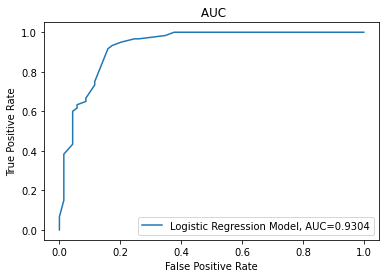

In [71]:
#set up plotting area
plt.figure(0).clf()
#fit logistic regression model and plot ROC curve
y_pred = logistic_model_pc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression Model, AUC="+str(auc))

plt.title(" AUC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#add legend
plt.legend()

#### Severity Estimation

In [72]:
# repayment type, interest only IO vs non interest only Non-IO
lgd.repayment_type_segment.unique()

array(['IO', 'Non-IO'], dtype=object)

In [73]:
lgd_sev = lgd[lgd.flag_sold == 1][['flag_sold','balance_at_default','ltv_utd','time_since_default', 
                                  'repayment_type_segment','tob','months_to_maturity', 'region', 
                                   'shortfall_balance_wo']]
lgd_sev["ltv_lower_70"] = (lgd_sev['ltv_utd'] <= 0.7).astype(int)
lgd_sev["repayment_IO"] = (lgd_sev["repayment_type_segment"]== 'IO').astype(int)
lgd_sev = pd.get_dummies(lgd_sev, columns=['region'], prefix='region')
# label_encoder = LabelEncoder()
# lgd_sev['region_encoded'] = label_encoder.fit_transform(lgd_sev['region'])

lgd_sev.head()

,flag_sold,balance_at_default,ltv_utd,time_since_default,repayment_type_segment,tob,months_to_maturity,shortfall_balance_wo,ltv_lower_70,repayment_IO,...,region_r_a,region_r_b,region_r_c,region_r_d,region_r_e,region_r_f,region_r_g,region_r_h,region_r_l,region_r_m
0,1,170203.44,0.448436,72,IO,164,136,0.13748,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,60368.09,0.838799,72,Non-IO,140,160,0.57900,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,207838.69,0.522509,72,IO,130,170,0.26548,1,1,...,0,1,0,0,0,0,0,0,0,0
3,1,73736.79,1.231607,72,IO,115,125,0.78205,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,132064.54,0.400000,72,IO,118,134,0.00410,1,1,...,1,0,0,0,0,0,0,0,0,0


In [74]:
# Split the dataset into training and testing sets 70% vs 30%
train, test = train_test_split(lgd_sev, test_size=0.3, random_state=42)

In [75]:
lgd_sev.columns

Index(['flag_sold', 'balance_at_default', 'ltv_utd', 'time_since_default',
       'repayment_type_segment', 'tob', 'months_to_maturity',
       'shortfall_balance_wo', 'ltv_lower_70', 'repayment_IO', 'region_other',
       'region_r_a', 'region_r_b', 'region_r_c', 'region_r_d', 'region_r_e',
       'region_r_f', 'region_r_g', 'region_r_h', 'region_r_l', 'region_r_m'],
      dtype='object')

In [76]:
# Create the regression tree model
tree_regressor = DecisionTreeRegressor(random_state=42)
feature_cols = ['balance_at_default', 'time_since_default', 'tob', 'months_to_maturity','ltv_lower_70', 
                'repayment_IO', 'region_other','region_r_a', 'region_r_b', 'region_r_c', 'region_r_d', 'region_r_e',
                'region_r_f', 'region_r_g', 'region_r_h', 'region_r_l', 'region_r_m']
X_train = train[feature_cols]
y_train = train['shortfall_balance_wo']
X_test = test[feature_cols]
y_test = test['shortfall_balance_wo']

# Train the model on the training data
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [77]:
y_pred = tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06164999945192307


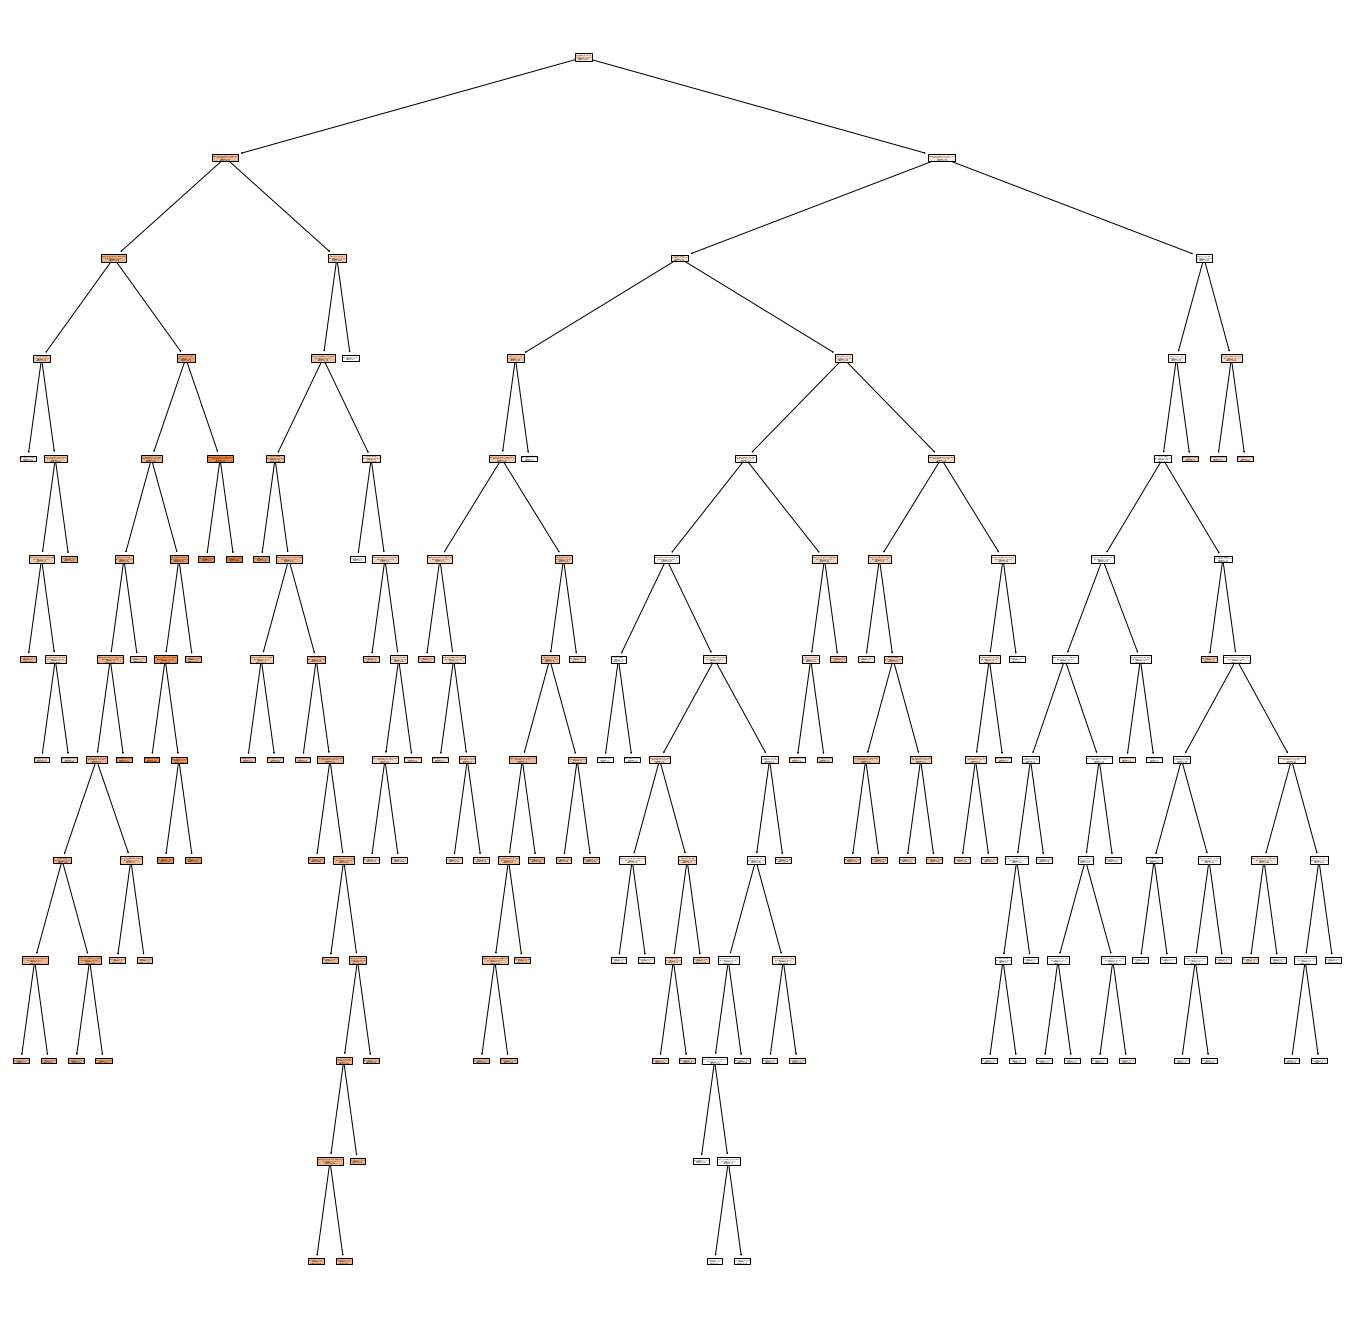

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24,24))
plot_tree(tree_regressor, filled=True, feature_names=feature_cols)
plt.show()

# overfiting

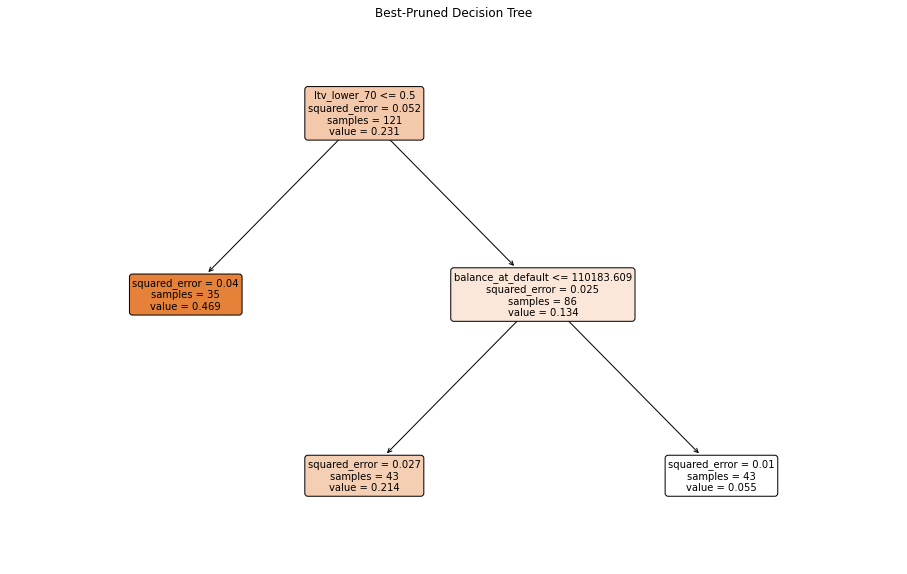

In [79]:
# Prune the tree using cost-complexity pruning
path = tree_regressor.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

# Iterate over alpha values and create pruned trees
pruned_trees = []
for alpha in alphas:
    pruned_tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)

# Evaluate pruned trees on the test data and choose the best one based on performance
best_mse = float('inf')
best_pruned_tree = None

for pruned_tree in pruned_trees:
    y_pred = pruned_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_pruned_tree = pruned_tree

        # Plot the best-pruned decision tree
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
plot_tree(best_pruned_tree, filled=True, feature_names=feature_cols, rounded=True, fontsize=10)
plt.title("Best-Pruned Decision Tree")
plt.show()

#### Random Forest LGD Modeling

In [80]:
# Create the Random Forest regressor
random_forest = RandomForestRegressor(random_state=42)

feature_cols = ['flag_sold', 'balance_at_default', 'time_since_default', 'tob', 'months_to_maturity','ltv_lower_70', 
                'repayment_IO', 'region_other','region_r_a', 'region_r_b', 'region_r_c', 'region_r_d', 'region_r_e',
                'region_r_f', 'region_r_g', 'region_r_h', 'region_r_l', 'region_r_m']
X_train = train[feature_cols]
y_train = train['shortfall_balance_wo']
X_test = test[feature_cols]
y_test = test['shortfall_balance_wo']

# Train the model on the training data
random_forest.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04551040734154705


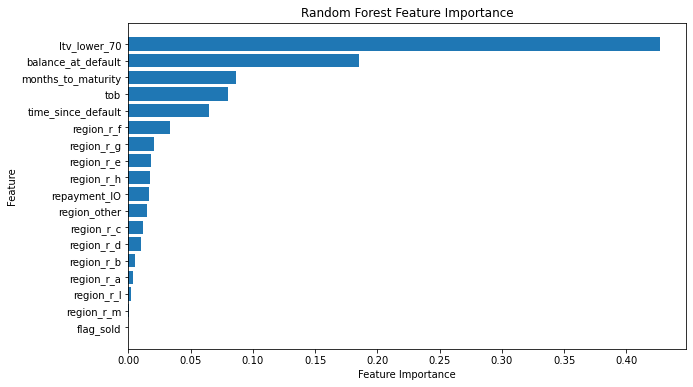

In [81]:
# Get feature importances
feature_importances = random_forest.feature_importances_

# Get the names of the feature columns
feature_names = feature_cols 

# Create a DataFrame to store feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

#### XGBoosting LGD

In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [83]:
# Create and train the XGBoost model
xgb_regressor = xgb.XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04134747380054274


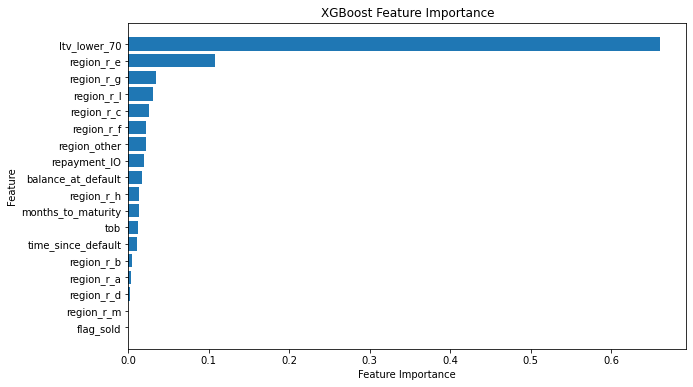

In [84]:
# Get feature importances
feature_importances = xgb_regressor.feature_importances_

# Get the names of the feature columns
feature_names = feature_cols

# Create a DataFrame to store feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### Prepayment, Competing Risks and EAD Modeling
- Data preparation
- Full prepayment modeling
- Competing risk modeling
- EAD modeling


In [85]:
prepay= pd.read_csv("bal_prep.csv")
print(prepay.shape) # 37346 records
print(prepay.head())
print(prepay.columns)

(37346, 25)
   X       id report_date  year  quarter  month   balance origination_date  \
0  1  1000170  2004-03-31  2004        1      3  44576.69       1999-09-17   
1  2  1000170  2004-06-30  2004        2      6  44145.22       1999-09-17   
2  3  1000170  2004-09-30  2004        3      9  43714.65       1999-09-17   
3  4  1000170  2004-12-31  2004        4     12  43276.97       1999-09-17   
4  5  1000170  2005-03-31  2005        1      3  42816.81       1999-09-17   

  maturity_date  loan_term  ...  part_prep_flag    gdp  uer  cpi     hpi  \
0    2019-09-17        240  ...               0  3.332  4.8  1.3  17.301   
1    2019-09-17        240  ...               0  2.890  4.8  1.4  19.598   
2    2019-09-17        240  ...               0  2.069  4.7  1.3  19.287   
3    2019-09-17        240  ...               0  1.844  4.7  1.4  14.396   
4    2019-09-17        240  ...               0  1.859  4.7  1.7   9.882   

     ir  multi_flag  pp_new  fppp_perc  ltv_utd  
0  4.73     

In [86]:
prepay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37346 entries, 0 to 37345
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 37346 non-null  int64  
 1   id                37346 non-null  int64  
 2   report_date       37346 non-null  object 
 3   year              37346 non-null  int64  
 4   quarter           37346 non-null  int64  
 5   month             37346 non-null  int64  
 6   balance           37346 non-null  float64
 7   origination_date  37346 non-null  object 
 8   maturity_date     37346 non-null  object 
 9   loan_term         37346 non-null  int64  
 10  vintage_year      37346 non-null  int64  
 11  tob               37346 non-null  int64  
 12  remaining_term    37346 non-null  int64  
 13  default_flag      37346 non-null  int64  
 14  prep_flag         37346 non-null  int64  
 15  part_prep_flag    37346 non-null  int64  
 16  gdp               37346 non-null  float6

In [87]:
# Convert the '--date' column to datetime format
prepay['report_date'] = pd.to_datetime(prepay['report_date'])
prepay['origination_date'] = pd.to_datetime(prepay['origination_date'])
prepay['maturity_date'] = pd.to_datetime(prepay['maturity_date'])

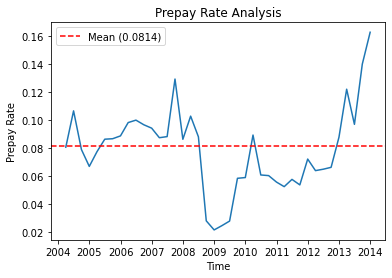

In [88]:
# Create a lineplot of the mean 'prepay rate' by year
sns.lineplot(data=prepay, x='report_date', y='prep_flag', ci=None)  # ci=None to remove confidence intervals

total_mean =prepay['prep_flag'].mean()

# Add a horizontal line for the total mean
plt.axhline(total_mean, color='red', linestyle='--', label=f'Mean ({total_mean:.4f})')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Prepay Rate')
plt.title('Prepay Rate Analysis')

# Show the plot
plt.legend()  # Show the legend with the total mean
plt.show()

In [89]:
# Trainig testing split for timeseries: testsize =30%

# Sort the data by the "year" in ascending order
prepay.sort_values(by='year', inplace=True)

# Calculate the index to split the data into training and testing
split_index = int(len(prepay) * 0.7)  

# Split the data
train = prepay.iloc[:split_index]
test = prepay.iloc[split_index:]

In [90]:
# feature_cols= ['tob','ltv_utd','uer','gdp','cpi', 'hpi', 'ir']
# X_train = train[feature_cols]
# y_train = train['prep_flag']
# X_test = test[feature_cols]
# y_test = test['prep_flag']

In [91]:
# # Create a logit link instance
# logit_link = sm.families.links.logit()

# # Create and fit the GLM model with the logit link instance
# glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial(link=logit_link))
# glm_results = glm_model.fit()

# # Print the model summary
# print(glm_results.summary())

In [92]:
feature_cols= ['ltv_utd','uer','gdp','cpi','hpi','ir']
X_train = train[feature_cols]
X_train['intercept'] = 1
y_train = train['prep_flag']
X_test = test[feature_cols]
X_test['intercept'] =1
y_test = test['prep_flag']

# Create a logit link instance
logit_link = sm.families.links.logit()

# Create and fit the GLM model with the logit link instance
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial(link=logit_link))
glm_results = glm_model.fit()

# Print the model summary
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              prep_flag   No. Observations:                26142
Model:                            GLM   Df Residuals:                    26135
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1698.0
Date:                Tue, 12 Sep 2023   Deviance:                       2999.4
Time:                        21:53:26   Pearson chi2:                 4.50e+16
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3743
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ltv_utd       -6.5991      0.205    -32.225      0.0

In [93]:
### Random Forest:
# Create the Random Forest regressor
random_forest = RandomForestClassifier(random_state=42)

feature_cols= ['ltv_utd','uer','gdp','cpi','hpi','ir']
X_train = train[feature_cols]

y_train = train['prep_flag']
X_test = test[feature_cols]
y_test = test['prep_flag']

# Train the model on the training data
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.40574794716172796
Confusion Matrix:
[[3846 6634]
 [  24  700]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.37      0.54     10480
           1       0.10      0.97      0.17       724

    accuracy                           0.41     11204
   macro avg       0.54      0.67      0.35     11204
weighted avg       0.94      0.41      0.51     11204



#### EAD modeling

In [94]:
ead = pd.read_csv("ead.csv")
print(ead.shape) # 366 records
print(ead.head())
print(ead.columns)

(366, 14)
       id report_date  year    balance  default_flag    gdp  uer  cpi     hpi  \
0  335679  2008-09-30  2008   89182.01             1 -1.449  5.9  4.8 -11.483   
1  342540  2008-06-30  2008  291269.44             1  1.005  5.3  3.4  -5.192   
2  343423  2011-03-31  2011  177314.43             1  2.262  7.8  4.1  -1.533   
3  346117  2004-12-31  2004  109932.69             1  1.844  4.7  1.4  14.396   
4  358929  2007-03-31  2007   66443.00             1  1.751  5.5  2.9  10.433   

     ir  uti_def_orig   uti_def   uti_ini  ccf_ratio  
0  4.75      0.371927  0.371927  0.166529   2.233406  
1  4.87      0.288527  0.288527  0.483252   0.597053  
2  3.89      0.736082  0.736082  0.210035   3.504565  
3  4.62      0.490713  0.490713  0.210162   2.334927  
4  4.75      0.478016  0.478016  0.187626   2.547710  
Index(['id', 'report_date', 'year', 'balance', 'default_flag', 'gdp', 'uer',
       'cpi', 'hpi', 'ir', 'uti_def_orig', 'uti_def', 'uti_ini', 'ccf_ratio'],
      dtype='obje

In [95]:
ead.default_flag.unique() # only for default.

array([1])

In [96]:
ead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            366 non-null    int64  
 1   report_date   366 non-null    object 
 2   year          366 non-null    int64  
 3   balance       366 non-null    float64
 4   default_flag  366 non-null    int64  
 5   gdp           366 non-null    float64
 6   uer           366 non-null    float64
 7   cpi           366 non-null    float64
 8   hpi           366 non-null    float64
 9   ir            366 non-null    float64
 10  uti_def_orig  366 non-null    float64
 11  uti_def       366 non-null    float64
 12  uti_ini       366 non-null    float64
 13  ccf_ratio     366 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 40.2+ KB


In [97]:
# Convert the '--date' column to datetime format
ead['report_date'] = pd.to_datetime(ead['report_date'])

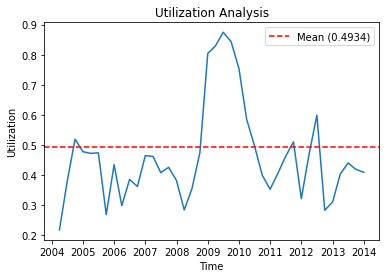

In [98]:
# Create a lineplot of the mean 'uti_def' by year
sns.lineplot(data=ead, x='report_date', y='uti_def', ci=None)  # ci=None to remove confidence intervals

total_mean = ead['uti_def'].mean()

# Add a horizontal line for the total mean
plt.axhline(total_mean, color='red', linestyle='--', label=f'Mean ({total_mean:.4f})')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Utilization')
plt.title('Utilization Analysis')

# Show the plot
plt.legend()  # Show the legend with the total mean
plt.show()

In [99]:
ead.columns

Index(['id', 'report_date', 'year', 'balance', 'default_flag', 'gdp', 'uer',
       'cpi', 'hpi', 'ir', 'uti_def_orig', 'uti_def', 'uti_ini', 'ccf_ratio'],
      dtype='object')

In [100]:
# Trainig testing split for timeseries: testsize =30%

# Sort the data by the "year" in ascending order
ead.sort_values(by='year', inplace=True)

# Calculate the index to split the data into training and testing
split_index = int(len(ead) * 0.7)  

# Split the data
train = ead.iloc[:split_index]
test = ead.iloc[split_index:]

In [101]:
feature_cols= ['uti_ini','uer','gdp','cpi','hpi','ir']
X_train = train[feature_cols]
X_train['intercept'] = 1
y_train = train['uti_def']
X_test = test[feature_cols]
X_test['intercept'] =1
y_test = test['uti_def']

# Create a logit link instance
logit_link = sm.families.links.logit()

# Create and fit the GLM model with the logit link instance
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial(link=logit_link))
glm_results = glm_model.fit()

# Print the model summary
print(glm_results.summary())

# not a good model

                 Generalized Linear Model Regression Results                  
Dep. Variable:                uti_def   No. Observations:                  256
Model:                            GLM   Df Residuals:                      249
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.00
Date:                Tue, 12 Sep 2023   Deviance:                       60.584
Time:                        21:53:27   Pearson chi2:                     55.9
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1406
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
uti_ini       -0.1384      1.681     -0.082      0.9

### Scenario Analysis and CECL 
- Data preparation
- Scenario Analysis
- CECL Computation and valuatation

In [102]:
macrov = pd.read_csv("macrov.csv")
print(macrov.shape) # 54 records
print(macrov.head(10))
print(macrov.columns)

(54, 7)
     DATE    LN_GDP    LN_CPI     LN_EQ     LN_FX      IR_S      IR_L
0  1999Q4  4.584177  4.584590  3.750966 -5.069477  0.012903  0.011275
1  2000Q1  4.595223  4.593452  3.740157 -5.070681  0.014103  0.011474
2  2000Q2  4.602494  4.603311  3.720306 -5.027500  0.014347  0.011363
3  2000Q3  4.608425  4.608944  3.741641 -4.999077  0.014111  0.011594
4  2000Q4  4.614437  4.614893  3.709038 -4.987262  0.013819  0.011315
5  2001Q1  4.623570  4.616626  3.664815 -4.987400  0.013132  0.011116
6  2001Q2  4.624728  4.621873  3.628357 -4.978310  0.012269  0.012134
7  2001Q3  4.630711  4.626059  3.510211 -4.998041  0.011530  0.012015
8  2001Q4  4.634632  4.625188  3.513670 -4.992250  0.009621  0.011450
9  2002Q1  4.639813  4.628679  3.517691 -4.978993  0.009541  0.011999
Index(['DATE', 'LN_GDP', 'LN_CPI', 'LN_EQ', 'LN_FX', 'IR_S', 'IR_L'], dtype='object')


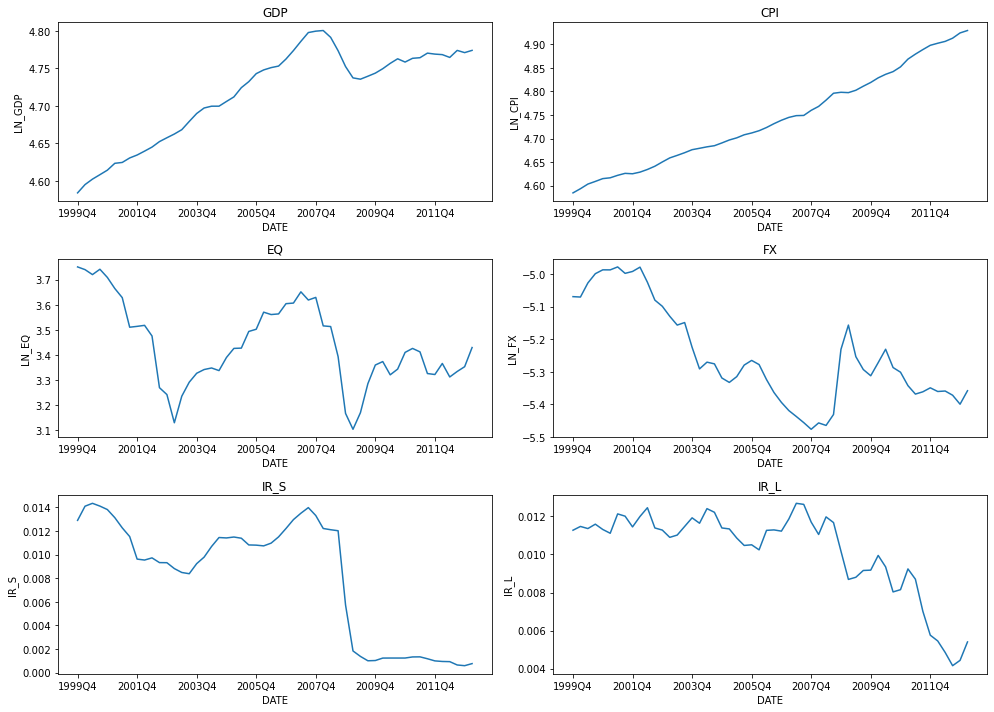

In [103]:
# Line-plot
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
# Plot GDP
sns.lineplot(data=macrov, x='DATE', y='LN_GDP', ax=axes[0, 0])
axes[0, 0].set_title('GDP')
axes[0, 0].set_xticks(axes[0, 0].get_xticks()[::8])
# Plot CPI
sns.lineplot(data=macrov, x='DATE', y='LN_CPI', ax=axes[0, 1])
axes[0, 1].set_title('CPI')
axes[0, 1].set_xticks(axes[0, 1].get_xticks()[::8])
# Plot EQ
sns.lineplot(data=macrov, x='DATE', y='LN_EQ', ax=axes[1, 0])
axes[1, 0].set_title('EQ')
axes[1, 0].set_xticks(axes[1, 0].get_xticks()[::8])
# Plot FX
sns.lineplot(data=macrov, x='DATE', y='LN_FX', ax=axes[1, 1])
axes[1, 1].set_title('FX')
axes[1, 1].set_xticks(axes[1, 1].get_xticks()[::8])
# Plot IR_S
sns.lineplot(data=macrov, x='DATE', y='IR_S', ax=axes[2, 0])
axes[2, 0].set_title('IR_S')
axes[2, 0].set_xticks(axes[2, 0].get_xticks()[::8])
# Plot IR_L
sns.lineplot(data=macrov, x='DATE', y='IR_L', ax=axes[2, 1])
axes[2, 1].set_title('IR_L')
axes[2, 1].set_xticks(axes[2, 1].get_xticks()[::8])
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [104]:
macrov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    54 non-null     object 
 1   LN_GDP  54 non-null     float64
 2   LN_CPI  54 non-null     float64
 3   LN_EQ   54 non-null     float64
 4   LN_FX   54 non-null     float64
 5   IR_S    54 non-null     float64
 6   IR_L    54 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.1+ KB


#### References
- https://www.tizianobellini.com/
- https://www2.deloitte.com/content/dam/Deloitte/us/Documents/audit/us-audit-cecl-credit-risk-modeling.pdf
- https://ncua.gov/regulation-supervision/regulatory-compliance-resources/cecl-resources/simplified-cecl-tool
- https://www.moodysanalytics.com/articles/2018/cecl%20modeling%20faqs


